# ejercicio de calentamiento con la data de clima de autralia

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics

In [ ]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_5/Data/weatherAUS.csv'
df=pd.read_csv(archivo)

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


hay presencia de NaN a simple vista, por lo que hay que hacer un .info para ver cuantos hay en cada columna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df_describe=df.describe()
df_describe.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

Se va a rellenar con el promedio para hacerle honor al tiempo

In [ ]:
for i in df_describe.columns:
    df[i].fillna(df[i].mean(),inplace=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [ ]:
df.fillna(method='ffill',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [ ]:
df_date=df.groupby(['Date','Location'])[['MaxTemp']].mean().reset_index().sort_values(by='Date')

<AxesSubplot:xlabel='MaxTemp', ylabel='Location'>

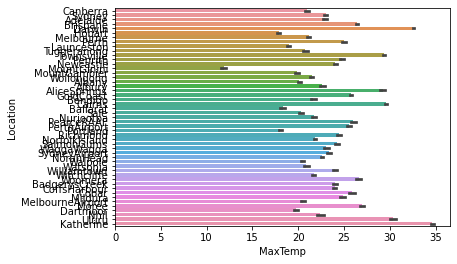

In [ ]:
sns.barplot(data=df_date,y='Location',x='MaxTemp')


Creando el regresor entre temperatura maxima y temperatura a las 3pm

Dividiendo la data 70-30

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
len(df)*0.7

101822.0

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Voy a estandarizar la temperatura a las 3pm

Media de los datos [21.68339032]
Varianza de los datos [46.92295762]


(array([   35.,   137.,   280.,   354.,   630.,  2482.,  8363., 14978.,
        19485., 20683., 22582., 16788., 13452., 10584.,  7466.,  3848.,
         2108.,   922.,   253.,    30.]),
 array([-3.95376033, -3.57347021, -3.1931801 , -2.81288998, -2.43259986,
        -2.05230975, -1.67201963, -1.29172951, -0.9114394 , -0.53114928,
        -0.15085916,  0.22943095,  0.60972107,  0.99001118,  1.3703013 ,
         1.75059142,  2.13088153,  2.51117165,  2.89146177,  3.27175188,
         3.652042  ]),
 <BarContainer object of 20 artists>)

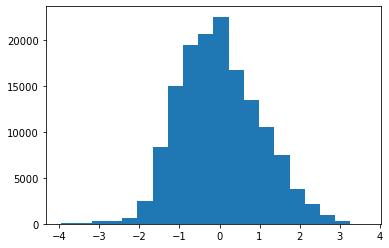

In [ ]:
scalerA = StandardScaler() # Creación de objeto StandardScaler
scalerA.fit(df[['Temp3pm']]) # Cálculo de parámetros de escalamiento
print('Media de los datos', scalerA.mean_)
print('Varianza de los datos', scalerA.var_)
Temp3pm_scaled = scalerA.transform(df[['Temp3pm']]) # Transformación de los datos
import matplotlib.pyplot as plt
plt.hist(Temp3pm_scaled, bins=20)

In [ ]:
df['Temp3pm_scaled']=Temp3pm_scaled

In [ ]:
df_training=df.loc[0:101822,:]

In [ ]:
df_training.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Temp3pm_scaled
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,0.017023
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,0.381985
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,0.221402
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,0.703151
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,1.170302


In [ ]:
x=df_training['Temp3pm_scaled'].to_numpy()
x

array([ 0.01702323,  0.38198495,  0.22140179, ..., -1.6180053 ,
       -1.10705888, -1.50121754])

In [ ]:
X = x.reshape(-1,1)
X

array([[ 0.01702323],
       [ 0.38198495],
       [ 0.22140179],
       ...,
       [-1.6180053 ],
       [-1.10705888],
       [-1.50121754]])

In [ ]:
y_trainig=df_training['MaxTemp'].to_numpy()

In [ ]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X,y_trainig) # Cálculo de parámetros \theta_0, \theta_1... etc
print('El bias calculado es', lin_reg.intercept_)
print('La pendiente calculada es: ', lin_reg.coef_)

El bias calculado es 23.167622294835674
La pendiente calculada es:  [6.89124392]


Sacando la data de testeo

In [ ]:
df_test=df.loc[101823:,:]

In [ ]:
df_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Temp3pm_scaled
101823,2015-06-27,MountGambier,9.0,12.7,0.0,1.0,1.8,N,37.0,N,...,82.0,1032.6,1031.1,7.0,5.0,10.5,12.3,No,No,-1.369831
101824,2015-06-28,MountGambier,5.4,14.2,0.2,1.0,5.2,SW,22.0,NNW,...,74.0,1034.6,1033.2,1.0,7.0,8.3,13.1,No,No,-1.253044
101825,2015-06-29,MountGambier,7.6,13.0,0.0,1.0,0.2,NNW,19.0,NNW,...,71.0,1033.5,1031.0,7.0,7.0,10.3,11.9,No,No,-1.428225
101826,2015-06-30,MountGambier,7.4,14.2,0.0,1.0,5.7,N,26.0,N,...,59.0,1029.9,1028.1,7.0,6.0,8.3,13.5,No,No,-1.194650
101827,2015-07-01,MountGambier,5.4,13.4,0.4,1.2,2.2,NNW,39.0,NNW,...,88.0,1027.0,1023.0,7.0,8.0,8.0,12.1,No,Yes,-1.399028


In [ ]:
X_new=df_test['Temp3pm_scaled'].to_numpy().reshape(-1,1)

In [ ]:
lin_reg.predict(X_new)

array([13.72778053, 14.53259341, 13.32537408, ..., 27.61080276,
       27.51020115, 22.37951902])

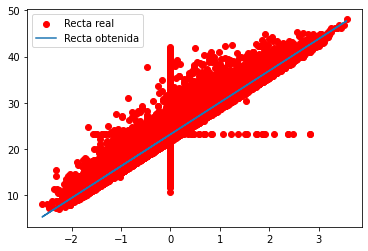

In [ ]:
y_new=df_test['MaxTemp'].to_numpy()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_new, y_new,c='r')
ax.plot(X_new, lin_reg.predict(X_new))
ax.legend(['Recta real','Recta obtenida'])
plt.show()

In [ ]:
y_pred=lin_reg.predict(X_new)
r2_score(y_new, y_pred)

0.9181463330781654

---
Clase

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split #separacion de data desde un codigo

X = df.drop(columns=['target']) # Separación de las características
y = df['target'] # Separación del target (corresponde a lo que quiero predecir)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=421) #Esta es la semilla, si la cambio, cambia la aleatoriedad
                                                    #este tiene el comando stratify para balancear la data en y


scaler = StandardScaler() #escalamiento de los datos
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # Ojo: escalamiento de test se hace en base al train

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
predictions = knn.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy:',knn.score(X_test, y_test))

[2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0]
[2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0]
Accuracy: 0.9777777777777777


---
Ejercicio de diabetes

Para esto revisar el cuaderno decimocuarta_clase_14_05_22 en carpeta semana 3

---
Ejercicio con data de sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsClassifier

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 41.4 KB


viendo como se comportan los target

In [ ]:
df['target'].sort_values()

156     25.0
297     31.0
57      37.0
201     39.0
260     39.0
       ...  
362    321.0
290    332.0
138    336.0
32     341.0
256    346.0
Name: target, Length: 442, dtype: float64

In [ ]:
(max(df['target'])-min(df['target']))/3

107.0

In [ ]:
lista_categoria=[]
for i in df['target']:
    if i >=25 and i<132:
        lista_categoria.append(0)
    elif i>=132 and i<239:
        lista_categoria.append(1)
    else:
        lista_categoria.append(2)
df['Categoria']=lista_categoria

In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Categoria
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0,0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0,1
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0,1


Generando el regresor

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df['s1'] # Separación de las características
y = df['target'] # Separación del target (corresponde a lo que quiero predecir)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=215)
X_train=X_train.to_numpy().reshape(-1,1)
X_test=X_test.to_numpy().reshape(-1,1)

In [ ]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train) # Cálculo de parámetros \theta_0, \theta_1... etc
print('El bias calculado es', lin_reg.intercept_)
print('La pendiente calculada es: ', lin_reg.coef_)

El bias calculado es 153.83938757005575
La pendiente calculada es:  [347.24730176]


In [ ]:

lin_reg.predict(X_test)

array([150.90559092, 142.30526441, 143.73865216, 188.17367247,
       166.67285619, 139.91628482, 171.92861128, 172.88420312,
       181.00673371, 147.5610195 , 147.08322358, 162.37269294,
       160.93930518, 140.87187665, 155.68355009, 160.93930518,
       181.00673371, 140.87187665, 157.11693784, 151.38338684,
       162.37269294, 149.47220317, 169.06183578, 160.93930518,
       140.87187665, 158.07252968, 137.52730523, 159.50591743,
       139.91628482, 143.26085624, 139.4384889 , 127.49359097,
       155.20575418, 165.71726436, 154.72795826, 160.93930518,
       162.37269294, 140.87187665, 138.00510115, 189.60706023,
       145.17203991, 152.33897867, 167.15065211, 158.07252968,
       151.86118275, 130.83816239, 128.4491828 , 146.60542766,
       156.63914193, 151.86118275, 169.06183578, 152.33897867,
       178.13995821, 128.92697872, 153.77236642, 175.75097862,
       146.60542766, 170.97301945, 140.87187665, 151.38338684,
       154.25016234, 159.02812151, 150.90559092, 168.10

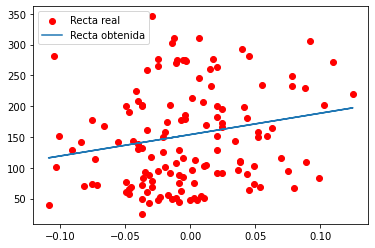

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_test, y_test,c='r')
ax.plot(X_test, lin_reg.predict(X_test))
ax.legend(['Recta real','Recta obtenida'])
plt.show()

In [ ]:
y_pred=lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.032797271330145206

Revisar las regresiones lineales multiples

Creando la matriz de confusión ESTO NO FUNCIONA PORQUE ES UN REGRESOR, PERO GUARDA LOS CODIGOS PORQUE FUNCIONAN PARA EL KNN 

In [ ]:
data_test=df.loc[y_test,:]
data_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Categoria
75,-0.009147,0.050680,-0.030996,-0.026328,-0.011201,-0.001001,-0.021311,-0.002592,0.006209,0.027917,42.0,0
60,-0.070900,-0.044642,-0.004050,-0.040099,-0.066239,-0.078662,0.052322,-0.076395,-0.051401,-0.034215,61.0,0
78,0.005383,-0.044642,-0.057941,-0.022885,-0.067615,-0.068328,-0.054446,-0.002592,0.042896,-0.083920,252.0,2
84,0.001751,-0.044642,-0.039618,-0.100923,-0.029088,-0.030124,0.044958,-0.050195,-0.068330,-0.129483,65.0,0
96,0.056239,0.050680,0.009961,0.049415,-0.004321,-0.012274,-0.043401,0.034309,0.060788,0.032059,150.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
161,-0.045472,0.050680,0.063852,0.070073,0.133274,0.131461,-0.039719,0.108111,0.075738,0.085907,217.0,1
101,0.016281,0.050680,-0.045007,0.063187,0.010815,-0.000374,0.063367,-0.039493,-0.030751,0.036201,102.0,0
45,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014956,-0.050783,53.0,0
201,-0.034575,0.050680,-0.055785,-0.015999,-0.009825,-0.007890,0.037595,-0.039493,-0.052959,0.027917,39.0,0


In [ ]:
data_test['Regresion']=y_pred
data_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Categoria,Regresion
75,-0.009147,0.050680,-0.030996,-0.026328,-0.011201,-0.001001,-0.021311,-0.002592,0.006209,0.027917,42.0,0,150.905591
60,-0.070900,-0.044642,-0.004050,-0.040099,-0.066239,-0.078662,0.052322,-0.076395,-0.051401,-0.034215,61.0,0,142.305264
78,0.005383,-0.044642,-0.057941,-0.022885,-0.067615,-0.068328,-0.054446,-0.002592,0.042896,-0.083920,252.0,2,143.738652
84,0.001751,-0.044642,-0.039618,-0.100923,-0.029088,-0.030124,0.044958,-0.050195,-0.068330,-0.129483,65.0,0,188.173672
96,0.056239,0.050680,0.009961,0.049415,-0.004321,-0.012274,-0.043401,0.034309,0.060788,0.032059,150.0,1,166.672856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-0.045472,0.050680,0.063852,0.070073,0.133274,0.131461,-0.039719,0.108111,0.075738,0.085907,217.0,1,142.305264
101,0.016281,0.050680,-0.045007,0.063187,0.010815,-0.000374,0.063367,-0.039493,-0.030751,0.036201,102.0,0,117.937673
45,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014956,-0.050783,53.0,0,150.905591
201,-0.034575,0.050680,-0.055785,-0.015999,-0.009825,-0.007890,0.037595,-0.039493,-0.052959,0.027917,39.0,0,136.571713


In [ ]:
lista_categoria=[]
for i in data_test['Regresion']:
    if i >=25 and i<132:
        lista_categoria.append(0)
    elif i>=132 and i<239:
        lista_categoria.append(1)
    else:
        lista_categoria.append(2)
data_test['Categoria_predicha']=lista_categoria

In [ ]:
data_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Categoria,Regresion,Categoria_predicha
75,-0.009147,0.050680,-0.030996,-0.026328,-0.011201,-0.001001,-0.021311,-0.002592,0.006209,0.027917,42.0,0,150.905591,1
60,-0.070900,-0.044642,-0.004050,-0.040099,-0.066239,-0.078662,0.052322,-0.076395,-0.051401,-0.034215,61.0,0,142.305264,1
78,0.005383,-0.044642,-0.057941,-0.022885,-0.067615,-0.068328,-0.054446,-0.002592,0.042896,-0.083920,252.0,2,143.738652,1
84,0.001751,-0.044642,-0.039618,-0.100923,-0.029088,-0.030124,0.044958,-0.050195,-0.068330,-0.129483,65.0,0,188.173672,1
96,0.056239,0.050680,0.009961,0.049415,-0.004321,-0.012274,-0.043401,0.034309,0.060788,0.032059,150.0,1,166.672856,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-0.045472,0.050680,0.063852,0.070073,0.133274,0.131461,-0.039719,0.108111,0.075738,0.085907,217.0,1,142.305264,1
101,0.016281,0.050680,-0.045007,0.063187,0.010815,-0.000374,0.063367,-0.039493,-0.030751,0.036201,102.0,0,117.937673,0
45,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014956,-0.050783,53.0,0,150.905591,1
201,-0.034575,0.050680,-0.055785,-0.015999,-0.009825,-0.007890,0.037595,-0.039493,-0.052959,0.027917,39.0,0,136.571713,1


In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(data_test['Categoria'],data_test['Categoria_predicha'])
cm.ravel()

array([ 5, 57,  0,  2, 50,  0,  5, 14,  0])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
metricas=precision_recall_fscore_support(data_test['Categoria'], data_test['Categoria_predicha'], average='macro')
metricas

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.2766299357208448, 0.34739454094292804, 0.2377232724053533, None)

In [ ]:
precision=metricas[0]
Recall=metricas[1] #exatitud de cada clase
Fscore=metricas[2] 

In [ ]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

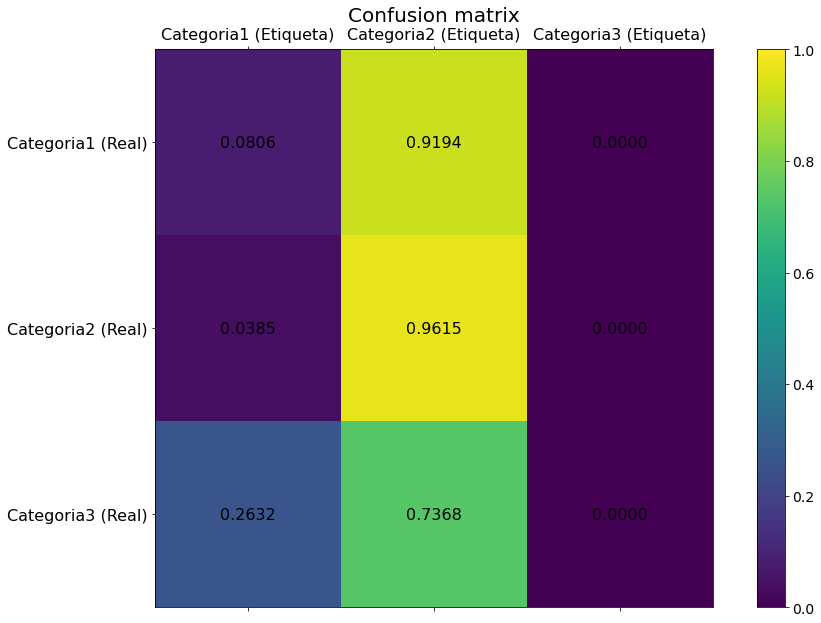

In [ ]:
plotCMa(cm,['Categoria1','Categoria2','Categoria3'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data_test['Categoria'], data_test['Categoria_predicha'], target_names=['Categoria1','Categoria2','Categoria3']))

              precision    recall  f1-score   support

  Categoria1       0.42      0.08      0.14        62
  Categoria2       0.41      0.96      0.58        52
  Categoria3       0.00      0.00      0.00        19

    accuracy                           0.41       133
   macro avg       0.28      0.35      0.24       133
weighted avg       0.36      0.41      0.29       133



/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

## Regresion lineal multiple 
https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsClassifier

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
x = df.drop(columns=['target']) # Separación de las características
y = df['target'] # Separación del target (corresponde a lo que quiero predecir)

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=135)


In [ ]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train) # Cálculo de parámetros \theta_0, \theta_1... etc
print('El bias calculado es', lin_reg.intercept_)
print('La pendiente calculada es: ', lin_reg.coef_)

El bias calculado es 153.83682922007947
La pendiente calculada es:  [ -56.02437038 -198.67754955  534.10054852  352.03824495 -957.13911682
  516.40143437  243.45700602  287.57381792  882.35041701  -15.78111101]


In [ ]:
len(X_test)

133

In [ ]:
len(y_test)

133

In [ ]:
y_pred=lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.4982150324397766

---
## ahora hay que hacer con el wine
se necesita estandarizar

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

data sin nulos

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


no se ven cosas raras

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

No habian duplicados

In [ ]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [ ]:
X = df.drop(columns=['target']) # Separación de las características
y = df['target'] # Separación del target (corresponde a lo que quiero predecir)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=135,
                                                    stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy:',knn.score(X_test, y_test))

[2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2]
[2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2]
Accuracy: 0.9629629629629629


In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test,predictions)
cm

array([[18,  0,  0],
       [ 1, 19,  1],
       [ 0,  0, 15]])

In [ ]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

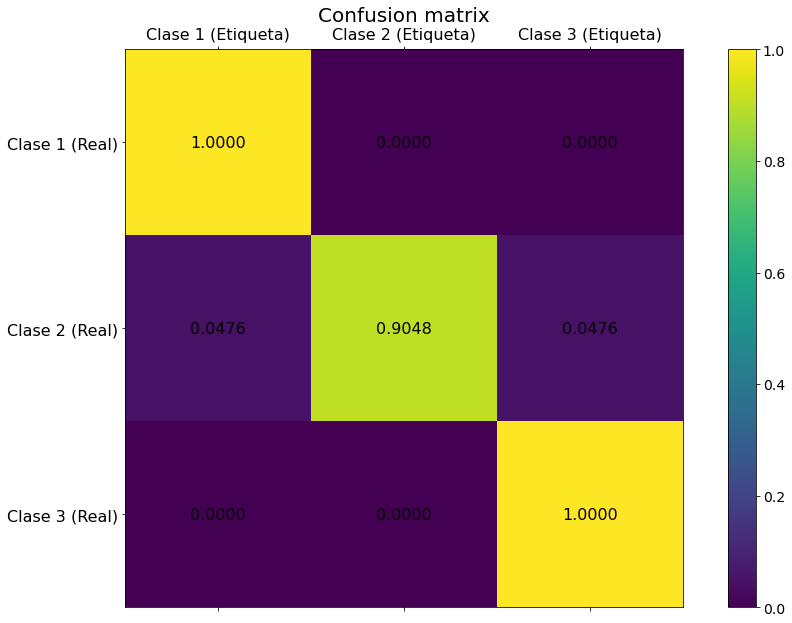

In [ ]:
plotCMa(cm,['Clase 1','Clase 2','Clase 3'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions , target_names=['Clase 1','Clase 2','Clase 3']))

              precision    recall  f1-score   support

     Clase 1       0.95      1.00      0.97        18
     Clase 2       1.00      0.90      0.95        21
     Clase 3       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

